# **Import Library:** 분석에 사용할 모듈 설치

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Deep-Learning/blob/main/Practice4-3_DeepLearning_CNNArchitectures_KK.ipynb)

In [1]:
# !pip install --upgrade pip
# !python -m pip install --user --upgrade pip

In [2]:
# # Tensorflow 및 Keras 설치하기
# !pip install tensorflow==2.10.*
# # !pip install --upgrade --user tensorflow
# !pip install -U tensorflow-addons
# !pip install keras
# # !pip install --upgrade --user keras
# !pip install keras-tqdm

In [3]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats
import tensorflow as tf
tf.get_logger().setLevel('ERROR')
tf.get_logger().warning('test')
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras import layers, regularizers, callbacks
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Dropout, Reshape
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.utils import plot_model

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation metrics
from sklearn import metrics
# for regression
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error
# for classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [4]:
# 사용자 정의 함수
from module_regression import *
from module_classification import *

# **Problem:** 숫자이미지 분류

## Data Preprocessing

In [5]:
# MNIST(Modified National Institute of Standards and Technology)를 Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (60000, 28, 28) 0 255
Y:  (60000,)
----------------test----------------
X:  (10000, 28, 28) 0 255
Y:  (10000,)


In [7]:
# 샘플 데이터 출력
# 0에서 255 사이의 값을 가진 데이터
for i in range(X_train[0].shape[0]):
    for j in range(X_train[0].shape[1]):
        print('{:4d}'.format(X_train[0][i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

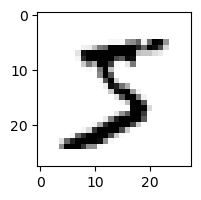

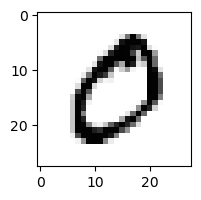

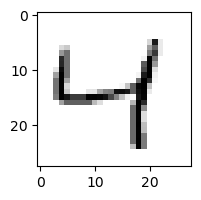

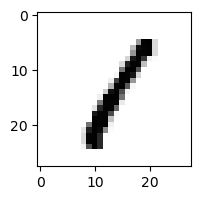

Label of train:  [5 0 4 1]


In [8]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i], cmap='Greys')
    plt.show()

print('Label of train: ', Y_train[:4])

In [9]:
# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0


In [10]:
# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)


## MLP

In [11]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


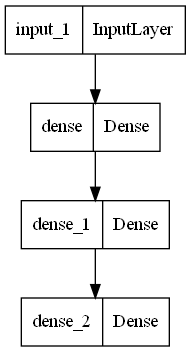

In [12]:
# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

Epoch 1/5
750/750 [==============================] - 4s 2ms/step - loss: 0.2548 - accuracy: 0.9256 - val_loss: 0.1228 - val_accuracy: 0.9636
Epoch 2/5
750/750 [==============================] - 1s 2ms/step - loss: 0.0988 - accuracy: 0.9698 - val_loss: 0.1071 - val_accuracy: 0.9658
Epoch 3/5
750/750 [==============================] - 1s 2ms/step - loss: 0.0646 - accuracy: 0.9796 - val_loss: 0.0984 - val_accuracy: 0.9718
Epoch 4/5
750/750 [==============================] - 1s 2ms/step - loss: 0.0478 - accuracy: 0.9845 - val_loss: 0.0844 - val_accuracy: 0.9753
Epoch 5/5
750/750 [==============================] - 1s 1ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0962 - val_accuracy: 0.9725


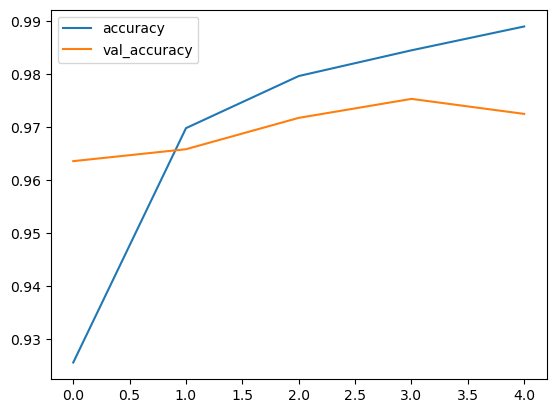

In [13]:
# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

### Prediction and Evaluation

In [14]:
# Train 데이터 예측하기
Y_trpred = model.predict(X_train)
print(Y_trpred, '\n\n', np.argmax(Y_trpred, axis=1))

1875/1875 [==============================] - 1s 688us/step
[[9.52698944e-12 1.20931134e-07 6.70699762e-09 ... 4.51128745e-10
  4.99383998e-12 1.60394897e-08]
 [9.99597490e-01 2.70939438e-07 3.99751792e-04 ... 3.24225340e-07
  3.31906058e-08 1.02208915e-07]
 [1.63497205e-09 4.82745506e-08 3.07506343e-05 ... 1.62237336e-06
  6.92733906e-08 6.49722497e-05]
 ...
 [2.79702667e-11 8.50792048e-10 4.34056003e-13 ... 2.24114607e-12
  1.79614557e-09 1.61534508e-09]
 [7.24415531e-06 1.14463410e-06 5.92962851e-06 ... 3.91274483e-07
  8.90274578e-07 8.62102780e-08]
 [7.51881043e-06 5.35187974e-06 7.51598927e-05 ... 8.49445405e-06
  9.99786198e-01 1.25391753e-05]] 

 [5 0 4 ... 5 6 8]


In [15]:
# Test 데이터 예측하기
Y_tepred = model.predict(X_test)
print(Y_tepred, '\n\n', np.argmax(Y_tepred, axis=1))

313/313 [==============================] - 0s 876us/step
[[1.21581508e-07 2.62208528e-06 1.03559563e-04 ... 9.99808252e-01
  2.02519573e-06 5.59276559e-05]
 [1.07897935e-11 1.66567787e-07 9.99999881e-01 ... 1.08743505e-12
  1.72939085e-08 7.84692977e-17]
 [2.41369662e-07 9.99780118e-01 1.66866550e-06 ... 1.01623824e-04
  5.12614752e-05 5.05195317e-08]
 ...
 [3.98224899e-12 1.03780639e-11 8.19165829e-12 ... 1.06970841e-08
  7.04477721e-09 3.78485964e-07]
 [1.11845030e-11 1.03253029e-12 6.71640274e-14 ... 1.03470132e-11
  2.12575600e-07 3.81442621e-12]
 [5.26327923e-08 1.17157173e-10 3.20393781e-07 ... 1.46049318e-11
  1.14903379e-07 9.71272646e-11]] 

 [7 2 1 ... 4 5 6]


In [16]:
# Train 예측 성능 평가하기
# 학습과정의 결과와 유사
model.evaluate(X_train, Y_train, batch_size=32)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.0406 - accuracy: 0.9878


[0.040586959570646286, 0.9878166913986206]

In [17]:
# Train 예측 성능 평가하기
# 학습과정의 결과와 유사
evaluation_class_ConfusionMatrix(Y_train, np.argmax(Y_trpred, axis=1))

,Pred 0,Pred 1,Pred 2,Pred 3,Pred 4,Pred 5,Pred 6,Pred 7,Pred 8,Pred 9
True 0,5869,1,30,0,0,0,5,0,16,2
True 1,0,6687,3,4,7,2,3,9,24,3
True 2,2,7,5934,0,1,1,0,6,6,1
True 3,3,0,88,5895,0,63,0,5,65,12
True 4,0,5,2,0,5794,1,1,3,3,33
True 5,3,1,6,6,1,5371,14,0,12,7
True 6,2,1,3,0,4,16,5887,0,5,0
True 7,1,16,24,3,7,8,0,6181,8,17
True 8,1,7,25,5,2,11,2,3,5787,8
True 9,4,2,4,4,24,13,0,14,20,5864


In [18]:
# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)

313/313 [==============================] - 1s 2ms/step - loss: 0.0683 - accuracy: 0.9775


[0.06830570846796036, 0.9775000214576721]

In [19]:
# Test 예측 성능 평가하기
evaluation_class_ConfusionMatrix(Y_test, np.argmax(Y_tepred, axis=1))

,Pred 0,Pred 1,Pred 2,Pred 3,Pred 4,Pred 5,Pred 6,Pred 7,Pred 8,Pred 9
True 0,966,0,6,0,1,1,2,1,2,1
True 1,0,1119,4,1,0,2,2,1,5,1
True 2,0,0,1022,1,1,0,1,3,4,0
True 3,2,0,14,966,0,14,0,3,8,3
True 4,1,2,3,1,963,0,3,0,0,9
True 5,2,0,0,4,1,875,5,0,4,1
True 6,4,3,1,0,4,6,936,0,4,0
True 7,0,6,12,2,0,1,0,998,2,7
True 8,1,0,3,4,2,4,1,2,953,4
True 9,2,3,1,4,9,3,0,3,7,977


In [20]:
# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_train.shape[0])
print('예측값: ', np.argmax(model.predict(X_train[idx_rand][np.newaxis,:])))
print('목표값: ', Y_train[idx_rand])

1/1 [==============================] - 0s 21ms/step
예측값:  9
목표값:  9


### Summary

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 256)               200960    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
750/750 [==========

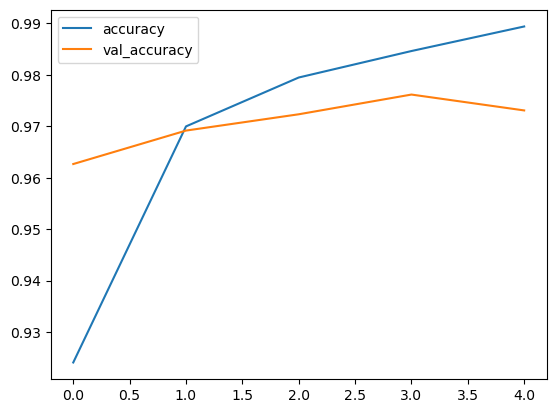

313/313 [==============================] - 1s 2ms/step - loss: 0.0761 - accuracy: 0.9781

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 885us/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,959,1,8,0,1,0,4,1,3,3
1,0,1121,4,0,0,2,2,2,4,0
2,0,0,1020,3,1,0,1,5,2,0
3,0,0,11,969,0,5,0,5,13,7
4,1,0,2,1,964,0,4,1,2,7
5,1,0,0,4,1,871,6,0,6,3
6,3,2,2,0,8,5,937,0,1,0
7,0,1,11,1,2,0,0,999,7,7
8,2,0,3,1,2,0,2,2,962,0


In [21]:
# 하이퍼파라미터
tf.random.set_seed(1)
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

### Convolution and Pooling

- **Convolution**

In [22]:
# 임의 데이터 생성
X = tf.random.normal(shape=(128,28,28,1), mean=0., stddev=1.) # [batch size, W, H, channel]
X.shape

TensorShape([128, 28, 28, 1])

In [23]:
# 합성곱을 통과한 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 26, 26, 32)


In [24]:
# STRIDE 이동을 빠르게 할 경우의 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 13, 13, 32)


In [25]:
# 입력과 출력의 크기가 같은 데이터
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same', activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 14, 14, 32)


- **Pooling**

In [26]:
# 임의 데이터 생성
X = tf.random.normal(shape=(128,28,28,1), mean=0., stddev=1.) # [batch size, W, H, channel]
hiddens = Conv2D(filters=32, kernel_size=(3,3), strides=2, padding='same', activation="relu")(X)
print('After Convolution: ', hiddens.shape)

After Convolution:  (128, 14, 14, 32)


In [27]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(2,2), strides=(2,2))(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 7, 7, 32)


In [28]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(4,4), strides=(4,4))(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 3, 3, 32)


In [29]:
# Max Pooling 이후의 데이터
hiddens_pool = MaxPooling2D(pool_size=(4,4), strides=(4,4), padding='same')(hiddens)
print('After Pooling: ', hiddens_pool.shape)

After Pooling:  (128, 4, 4, 32)


### Summary

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 10)                250890    
                       

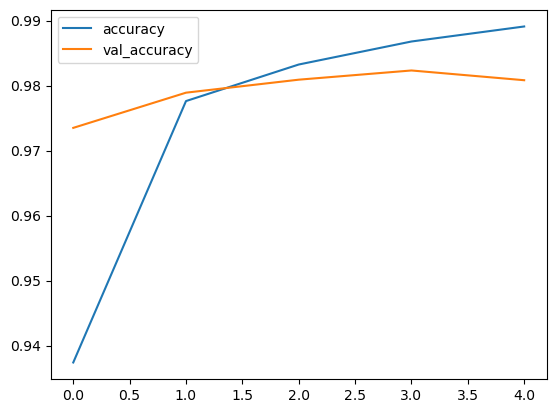

313/313 [==============================] - 1s 2ms/step - loss: 0.0568 - accuracy: 0.9816

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,972,0,2,1,0,1,1,0,3,0
1,0,1127,4,1,2,0,1,0,0,0
2,3,1,1019,0,1,0,0,5,3,0
3,0,0,4,987,0,13,0,1,5,0
4,1,1,1,0,971,0,1,1,0,6
5,2,0,1,4,0,883,2,0,0,0
6,6,2,1,0,4,5,937,0,3,0
7,0,2,15,3,1,0,0,998,6,3
8,5,0,7,0,2,2,2,2,951,3


In [30]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Flatten()(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN with Tuning

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        73792     
                       

Training:   0%|                                                                                 0/5 ETA: ?s,  …

Epoch 1/5
750/750 [==============================] - 4s 5ms/step - loss: 0.3709 - accuracy: 0.8819 - val_loss: 0.0799 - val_accuracy: 0.9751
Epoch 2/5
750/750 [==============================] - 4s 5ms/step - loss: 0.1400 - accuracy: 0.9590 - val_loss: 0.0572 - val_accuracy: 0.9826
Epoch 3/5
750/750 [==============================] - 4s 5ms/step - loss: 0.1061 - accuracy: 0.9686 - val_loss: 0.0453 - val_accuracy: 0.9878
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0879 - accuracy: 0.9734 - val_loss: 0.0449 - val_accuracy: 0.9868
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0801 - accuracy: 0.9759 - val_loss: 0.0427 - val_accuracy: 0.9872


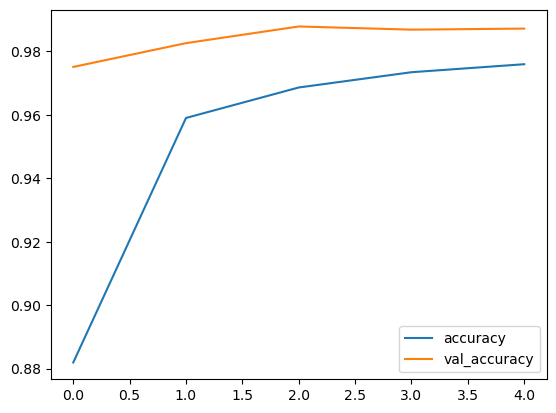

313/313 [==============================] - 1s 2ms/step - loss: 0.0300 - accuracy: 0.9908

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 1ms/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,974,0,1,0,0,1,2,0,2,0
1,0,1132,2,1,0,0,0,0,0,0
2,1,0,1027,0,0,0,0,3,1,0
3,0,0,4,996,0,4,0,3,2,1
4,0,0,0,0,978,0,1,0,1,2
5,1,0,0,4,0,885,2,0,0,0
6,2,2,0,0,1,1,952,0,0,0
7,0,3,9,0,0,0,0,1008,2,6
8,1,1,2,0,1,0,2,2,963,2


In [31]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 5
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Number_MNIST_CNN.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv2D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

In [32]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
print('예측값: ', np.argmax(model.predict(X_test[idx_rand][np.newaxis,:])))

# **Problem:** 패션이미지 분류

## Data Preprocessing

In [33]:
# Train, Test 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [34]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

---------------train----------------
X:  (60000, 28, 28) 0 255
Y:  (60000,)
----------------test----------------
X:  (10000, 28, 28) 0 255
Y:  (10000,)


In [35]:
# 샘플 데이터 출력
# 0에서 255 사이의 값을 가진 데이터
for i in range(X_train[0].shape[0]):
    for j in range(X_train[0].shape[1]):
        print('{:4d}'.format(X_train[0][i][j]), end='')
    print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0
   0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3
   0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15
   0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66
   0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127

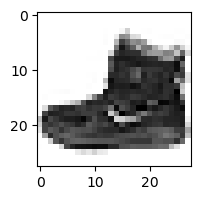

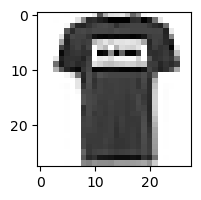

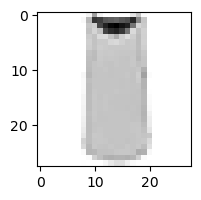

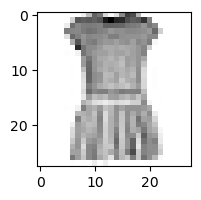

Label of train:  ['Ankle Boot', 'T-shirt', 'T-shirt', 'Dress']


In [36]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i], cmap='Greys')
    plt.show()

Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('Label of train: ', [Y_label_list[num] for num in Y_train[:4]])

## MLP

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 784) Y_train: (60000,)
X_test: (10000, 784) Y_test: (10000,)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
750/750 [=========

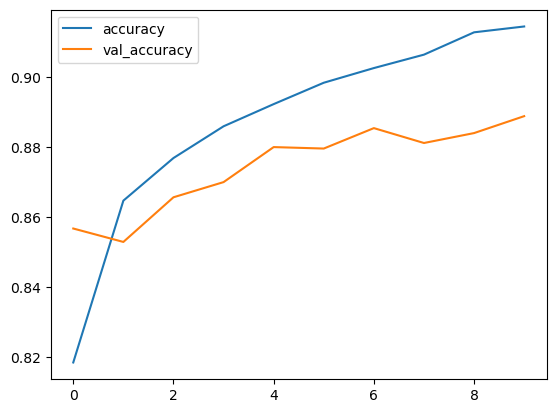

313/313 [==============================] - 0s 1ms/step - loss: 0.3483 - accuracy: 0.8811

Test Confusion Maxtrix: 
313/313 [==============================] - 0s 705us/step


Pred,0,1,2,3,4,5,6,7,8,9
True,,,,,,,,,,
0,778,9,27,48,7,0,127,0,4,0
1,1,979,1,13,4,0,2,0,0,0
2,7,2,760,23,145,0,63,0,0,0
3,11,12,5,907,42,0,21,0,2,0
4,0,0,63,27,847,0,59,0,4,0
5,0,0,0,0,0,975,0,16,1,8
6,90,3,83,38,76,0,702,0,8,0
7,0,0,0,0,0,20,0,961,0,19
8,9,0,6,10,4,3,7,5,956,0


In [37]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

In [38]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_CNN.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv2D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

normalized X:  (60000, 28, 28) 0.0 1.0
normalized X:  (10000, 28, 28) 0.0 1.0
X_train: (60000, 28, 28, 1) Y_train: (60000,)
X_test: (10000, 28, 28, 1) Y_test: (10000,)
Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 64)        73792     
                       

Training:   0%|                                                                                0/10 ETA: ?s,  …

Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/model_5/max_pooling2d_6/MaxPool/MaxPoolGrad' defined at (most recent call last):
    File "C:\Users\KK\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\KK\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\KK\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\KK\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\KK\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Users\KK\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\KK\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\KK\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\KK\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\KK\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\KK\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\KK\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\KK\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Users\KK\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 390, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\KK\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\KK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2914, in run_cell
      result = self._run_cell(
    File "C:\Users\KK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2960, in _run_cell
      return runner(coro)
    File "C:\Users\KK\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\KK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3185, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\KK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3377, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\KK\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\KK\AppData\Local\Temp\ipykernel_10348\121587708.py", line 64, in <module>
      model_fit = model.fit(X_train, Y_train, validation_split=0.2,
    File "C:\Users\KK\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\KK\anaconda3\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\KK\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\KK\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\KK\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\KK\anaconda3\lib\site-packages\keras\engine\training.py", line 997, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\KK\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 576, in minimize
      grads_and_vars = self._compute_gradients(
    File "C:\Users\KK\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 634, in _compute_gradients
      grads_and_vars = self._get_gradients(
    File "C:\Users\KK\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\optimizer_v2.py", line 510, in _get_gradients
      grads = tape.gradient(loss, var_list, grad_loss)
Node: 'gradient_tape/model_5/max_pooling2d_6/MaxPool/MaxPoolGrad'
OOM when allocating tensor with shape[64,28,28,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/model_5/max_pooling2d_6/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_191461]

In [ ]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

## ResNet50

In [ ]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 10
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','Fashion_MNIST_ResNet50.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.fashion_mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(-1, X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(-1, X_test.shape[1], X_train.shape[2], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
model = ResNet50(input_tensor=inputs, pooling='max', include_top=True, weights=None)
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(Y_test, np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

In [ ]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

# **Problem:** 컬러사물이미지 분류

## Data Preprocessing

In [ ]:
# Train, Test 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [ ]:
# 데이터의 갯수와 크기 확인
print('---------------train----------------')
print('X: ', X_train.shape, X_train.min(), X_train.max())
print('Y: ', Y_train.shape)
print('----------------test----------------')
print('X: ', X_test.shape, X_test.min(), X_test.max())
print('Y: ', Y_test.shape)

In [ ]:
# 샘플 데이터 시각화
# 0에서 255 사이의 값을 가진 데이터 시각화
for i in range(4):
    plt.figure(figsize=(2,2))
    plt.imshow(X_train[i])
    plt.show()

Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('Label of train: ', [Y_label_list[num] for num in Y_train.flatten()[:4]])

## MLP

In [ ]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION)(inputs)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

## CNN

In [ ]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_CNN.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
hiddens = Conv2D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv2D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling2D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(10, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

In [ ]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

## ResNet50

In [ ]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'softmax'
DROPOUT_RATIO = 0.25
LOSS = 'categorical_crossentropy'
OPTIMIZER = 'adam'
METRICS = ['accuracy']
BATCH_SIZE = 64
EPOCHS = 30
VERBOSE = 1
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','ColorObject_MNIST_ResNet50.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# Train, Test로 로딩
mnist = keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# 데이터 스케일링
X_train = X_train.astype("float32")/255
print('normalized X: ', X_train.shape, X_train.min(), X_train.max())
X_test = X_test.astype("float32")/255
print('normalized X: ', X_test.shape, X_test.min(), X_test.max())

# Reshape
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3]))   
model = ResNet50(input_tensor=inputs, pooling='max', include_top=True, weights=None,
                 classes=10)
model.summary() 
plot_model(model) 

# 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, validation_split=0.2,
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

# Train 예측 성능 평가하기
model.evaluate(X_train, Y_train, batch_size=32)

# Test 예측 성능 평가하기
model.evaluate(X_test, Y_test, batch_size=32)
print('\nTest Confusion Maxtrix: ')
pd.crosstab(np.argmax(Y_test, axis=1), np.argmax(model.predict(X_test), axis=1),
            rownames=['True'], colnames=['Pred'])

In [ ]:
# 베스트 모델 로딩
model = load_model(FILENAME)

# 임의 데이터를 예측하고 정답과 비교하기
idx_rand = np.random.randint(0, X_test.shape[0])
print('목표값: ')
plt.figure(figsize=(2,2))
plt.imshow(X_test[idx_rand], cmap='gray')
plt.show()
Y_label_list = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('예측값: ', Y_label_list[np.argmax(model.predict(X_test[idx_rand][np.newaxis,:]))])

# **Problem:** 보스턴 집값 예측

## MLP

In [ ]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = (3,3)
STRIDE = 1
POOL_SIZE = (2,2)
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_MLP.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# 네트워크 구축
inputs = Input(shape=(X_train_fes.shape[1],))   
hiddens = Dense(256, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(inputs)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(128, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(64, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION, kernel_regularizer=REGULARIZER)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train_fes, Y_train, 
                      validation_data=(X_test_fes, Y_test),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

In [ ]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train_fes), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test_fes), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

## CNN

<center><img src='Image/Expert/Conv1D2D3D.PNG' width='800'>(https://i.stack.imgur.com/)</center>

In [ ]:
# 하이퍼파라미터
tf.random.set_seed(1)
KERNEL_SIZE = 3
STRIDE = 1
POOL_SIZE = 2
POOL_STRIDE = 2
PADDING = 'same'
HIDDEN_ACTIVATION = 'relu'
OUTPUT_ACTIVATION = 'linear'
REGULARIZER = regularizers.l2(0.01)
DROPOUT_RATIO = 0.25
LOSS = 'mse'
OPTIMIZER = 'adam'
METRICS = ['mse']
BATCH_SIZE = 32
EPOCHS = 500
VERBOSE = 0
################
EARLYSTOP_PATIENT = 10
MONITOR = 'val_loss'
FILENAME = os.path.join(os.getcwd(),'Model','BostonHousing_CNN.h5')
CALLBACK = [callbacks.EarlyStopping(monitor=MONITOR, mode='min', 
                                    patience=EARLYSTOP_PATIENT, verbose=1),
            tfa.callbacks.TQDMProgressBar(show_epoch_progress=False),
            callbacks.ModelCheckpoint(monitor=MONITOR, mode='min', save_best_only=True, 
                                      filepath=FILENAME)]
################

# 사용자 정의 함수
from module_regression import *

# 데이터 로딩
location = os.path.join('.', 'Data', 'BostonHousingPrice', 'Price_Modify_KK.csv')
df = pd.read_csv(location)

# 데이터 전처리
df = prep(df)

Y_colname = ['Price']
X_train, X_test, Y_train, Y_test = datasplit(df, Y_colname)

X_train_fe = feature_engineering(X_train)
X_test_fe = feature_engineering(X_test)
X_train_fe, X_test_fe = col_mapping(X_train_fe, X_test_fe)   

scaler = preprocessing.MinMaxScaler()
X_train_fes, X_test_fes = scale(scaler, X_train_fe, X_test_fe)

# Reshape
X_train = X_train_fes.values.reshape(-1, X_train_fes.shape[1], 1)
X_test = X_test_fes.values.reshape(-1, X_test_fes.shape[1], 1)
print('X_train:', X_train.shape, 'Y_train:', Y_train.shape)
print('X_test:', X_test.shape, 'Y_test:', Y_test.shape)

# 네트워크 구축
inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))   
hiddens = Conv1D(128, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(inputs)
hiddens = MaxPooling1D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Conv1D(64, kernel_size=KERNEL_SIZE, strides=STRIDE, padding=PADDING, 
                 activation=HIDDEN_ACTIVATION)(hiddens)
hiddens = MaxPooling1D(pool_size=POOL_SIZE, strides=POOL_STRIDE)(hiddens)
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
hiddens = Flatten()(hiddens)
hiddens = Dense(32, activation=HIDDEN_ACTIVATION)(hiddens)  
hiddens = Dropout(DROPOUT_RATIO)(hiddens)
output = Dense(1, activation=OUTPUT_ACTIVATION)(hiddens)  
model = Model(inputs, output)  
model.summary() 
plot_model(model) 

## 데이터 학습하기
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=METRICS)
model_fit = model.fit(X_train, Y_train, 
                      validation_data=(X_test, Y_test),
                      batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE,
                      callbacks=CALLBACK)
plt.plot(pd.DataFrame(model_fit.history[METRICS[0]]))
plt.plot(pd.DataFrame(model_fit.history['val_'+METRICS[0]]))
plt.legend([METRICS[0], 'val_'+METRICS[0]])
plt.show()

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)

In [ ]:
# 베스트 모델 로딩
model = load_model(FILENAME)

## 예측하기
Y_trpred = pd.DataFrame(model.predict(X_train), 
                        index=Y_train.index, columns=['Pred'])
Y_tepred = pd.DataFrame(model.predict(X_test), 
                        index=Y_test.index, columns=['Pred'])
plot_prediction(pd.concat([Y_train, Y_trpred], axis=1).reset_index().iloc[:,1:])
plot_prediction(pd.concat([Y_test, Y_tepred], axis=1).reset_index().iloc[:,1:])

# 분석 검증
Score_nn_early = evaluation_reg_trte(Y_train, Y_trpred, Y_test, Y_tepred)
display(Score_nn_early)